In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn import svm

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
# Gaussian kernal function
def gaussianKernel(x1,x2,sigma=2):
    norm=np.sum(np.square(x1-x2))
    return(np.exp(-norm/(2*np.square(sigma))))

In [3]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

In [6]:
# load data
data = loadmat('./ex6data2.mat')
print(data.keys())
X, y = data['X'],data['y']


dict_keys(['__globals__', 'X', '__version__', '__header__', 'y'])


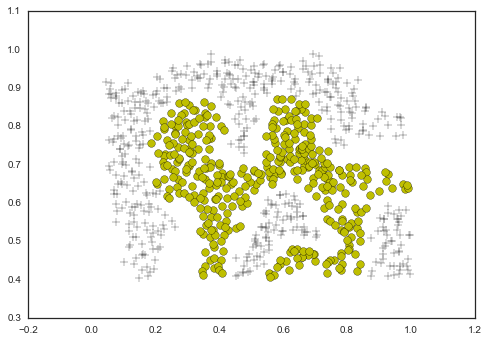

In [7]:
# plot data
def plotData(X,y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    plt.scatter(X[pos,0],X[pos,1],marker='+',s=60,c='k')
    plt.scatter(X[neg,0],X[neg,1],marker='o',s=60,c='y')

plotData(X,y)

In [11]:
#Function to draw the SVM boundary
def plotBoundary(my_svm, xmin, xmax, ymin, ymax):
    """
    Function to plot the decision boundary for a trained SVM
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the SVM classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    xvals = np.linspace(xmin,xmax,100)
    yvals = np.linspace(ymin,ymax,100)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(my_svm.predict(np.c_[xvals[i],yvals[j]]))
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( u, v, zvals )
    plt.title("Decision Boundary")    

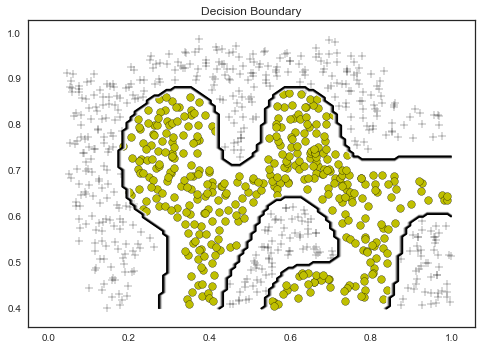

In [40]:
# train the svm
plotData(X,y)
#SVM initializing
sigma=0.1
gamma=np.power(sigma,-2)
my_svm = svm.SVC(C=1, kernel='rbf',gamma=gamma)
#SVM training
my_svm.fit(X, y.ravel())
#SVM predicting
plotBoundary(my_svm, 0.0, 1.0, 0.4, 1.0)